# Computer vision with tensorflow
## Pizza🍕 vs Steak🥩 Problem

# Get the data

The images we are working with from food101 dataset (101 different classes of food) : https://www.kaggle.com/dansbecker/food-101
 However we have modified it to use only two classes pizza and steak, using the image data modification notebook:
 https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2021-12-07 06:26:49--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.1.208, 172.253.115.128, 142.250.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.1.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  94.5MB/s    in 1.1s    

2021-12-07 06:26:50 (94.5 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data 
A very crucial step at the beginning of any machine learning project is becoming one with the data and for a computer vision project this usually means visualizing many samples of the data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os
# Walk through the pizza directory and list the number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, lets get the class names programmatically

In [ ]:
# Get the class names programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # Create a list of class names from the sub directories
print(class_names)

['pizza' 'steak']


In [ ]:
# Lets visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Set up the target directory ( we will view images from here)
  target_folder = target_dir+target_class

  # Get a random image path 
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])

  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')
  print(f'image shape : {img.shape}') # Show the shape of the image

  return img

['3640915.jpg']
image shape : (512, 384, 3)


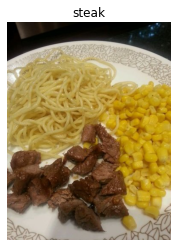

In [ ]:
# View a random image from training dataset
img = view_random_image(target_dir = 'pizza_steak/train/',
                        target_class = 'steak')

In [ ]:
# The images we have imported and plotted are actually in the form of giant array/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 384, 3), dtype=uint8, numpy=
array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 13,  14,   8],
        [ 11,  12,   6],
        [  8,   9,   3]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 19,  20,  14],
        [ 18,  19,  13],
        [ 17,  18,  12]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 17,  18,  12],
        [ 17,  18,  12],
        [ 15,  16,  10]],

       ...,

       [[189, 172, 156],
        [189, 172, 156],
        [189, 171, 157],
        ...,
        [136, 120, 105],
        [163, 147, 132],
        [161, 145, 130]],

       [[175, 158, 142],
        [191, 174, 158],
        [201, 183, 169],
        ...,
        [126, 110,  94],
        [159, 143, 127],
        [163, 147, 131]],

       [[172, 155, 139],
        [197, 180, 164],
        [200, 182, 168],
        ...,
        [112,  96,  8

In [ ]:
# View the image shape
img.shape # returns height, width and colour channels

(512, 384, 3)

**NOTE** As we have discussed before, many machine learning models including neural networks prefer the values they work with between 0 and 1. Knowing this, one of the most important preprocessing steps for working with the images is to scale the images (also referred to as normalization) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value)

In [ ]:
# Get all the pixel values between 0 and 1
img/255.

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.05098039, 0.05490196, 0.03137255],
        [0.04313725, 0.04705882, 0.02352941],
        [0.03137255, 0.03529412, 0.01176471]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.0745098 , 0.07843137, 0.05490196],
        [0.07058824, 0.0745098 , 0.05098039],
        [0.06666667, 0.07058824, 0.04705882]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.06666667, 0.07058824, 0.04705882],
        [0.06666667, 0.07058824, 0.04705882],
        [0.05882353, 0.0627451 , 0.03921569]],

       ...,

       [[0.74117647, 0.6745098 , 0.61176471],
        [0.74117647, 0.6745098 , 0.61176471],
        [0.74117647, 0

## An end to end example
Lets build a convolutional neural network to find pattens in our images
* Load our images
* Pre process our images
* Build our CNN to find patterns in our images
* Compile our CNN
* Fit out CNN


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the random seed
tf.random.set_seed(42)

# Pre process the data (get all the pixel values between 0 and 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = '/content/pizza_steak/train'
test_dir = "/content/pizza_steak/test/"

# Import data from directories and turn into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)
# Build a CNN model (same as Tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
 tf.keras.layers.Conv2D(filters=10,
                        kernel_size=3,
                        activation='relu',
                        input_shape=(224, 224, 3)),
 tf.keras.layers.Conv2D(10, 3 , activation='relu'),
 tf.keras.layers.MaxPool2D(pool_size=2,
                           padding='valid'),
 tf.keras.layers.Conv2D(10, 3, activation='relu'),
 tf.keras.layers.Conv2D(10, 3, activation='relu'),
 tf.keras.layers.MaxPool2D(2),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data, epochs=5,
                        steps_per_epoch =len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data)) # Train data generator generates both the data and the labels ans stores them in the object train_data, hence train_data alone can be passes to the fit function as it also contains the label data


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 116s 2s/step - loss: 0.6014 - accuracy: 0.6820 - val_loss: 0.4319 - val_accuracy: 0.8240
Epoch 2/5
47/47 [==============================] - 105s 2s/step - loss: 0.4606 - accuracy: 0.7827 - val_loss: 0.3936 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 105s 2s/step - loss: 0.4048 - accuracy: 0.8220 - val_loss: 0.3304 - val_accuracy: 0.8720
Epoch 4/5
47/47 [==============================] - 105s 2s/step - loss: 0.3732 - accuracy: 0.8460 - val_loss: 0.3449 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 104s 2s/step - loss: 0.3263 - accuracy: 0.8687 - val_loss: 0.2816 - val_accuracy: 0.8800


**NOTE** - If the above cell is taking longer than ~ 10 secs per epoch, make sure that you are running a GPU by going to to Runtime -> Change Runtime Time -> GPU ( you might have rerun some cell above

In [ ]:
# Get the model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

Go through the CNN explainer video and compare our neural network with the one there
https://poloclub.github.io/cnn-explainer/#article-relu

## Using the same model as before
Lets replicate the model built int the previous section to see if it works with our image data from [Tensorflow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.61262&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Build the mode to replicate tensorflow playground model
model_2 = tf.keras.Sequential([
 tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
 tf.keras.layers.Dense(4,activation='relu'),
 tf.keras.layers.Dense(4, activation='relu'),
 tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 15s 303ms/step - loss: 1.7655 - accuracy: 0.5107 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 14s 297ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 11s 239ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 11s 242ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 14s 296ms/step - loss: 0.6932 - accuracy: 0.4933 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
# Get summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN(model_1), model_2 performs terribly, let's try to improve model_2

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create model( same as above but lets steup up it a bit)
model_3 = tf.keras.Sequential([
 tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
 tf.keras.layers.Dense(100, activation='relu'),
 tf.keras.layers.Dense(100, activation='relu'),
 tf.keras.layers.Dense(100, activation='relu'),
 tf.keras.layers.Dense(1, activation='sigmoid')
])
 
# Compile the model
model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
hisory_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 18s 374ms/step - loss: 3.6593 - accuracy: 0.6133 - val_loss: 0.4994 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 16s 329ms/step - loss: 0.8578 - accuracy: 0.6933 - val_loss: 0.5807 - val_accuracy: 0.7340
Epoch 3/5
47/47 [==============================] - 16s 329ms/step - loss: 0.6876 - accuracy: 0.7227 - val_loss: 0.4296 - val_accuracy: 0.8000
Epoch 4/5
47/47 [==============================] - 16s 331ms/step - loss: 0.5690 - accuracy: 0.7487 - val_loss: 0.4457 - val_accuracy: 0.7780
Epoch 5/5
47/47 [==============================] - 18s 379ms/step - loss: 0.5674 - accuracy: 0.7580 - val_loss: 0.4349 - val_accuracy: 0.7840


In [ ]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


**NOTE** - You can think of trainable parameters as **patterns a model can learn from data**. Intuitively, you might think more is better. And, in lots of cases it is. But in this case, the difference is two defferen styles of model we are using. Whereas a series of different layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**.
So even thought these are less learnable patterns in our conc=volutionla neural network, these are often more helpful in deciphering between different **features** in an image

## Binary classification - Lets break it down
1. Become one with the data
2. Preprocess the data ( prepare it for the model- scaling/normalizing) & turning the data into batches
3. Create the model (start with a base line)
4. Fit the model
5. Evaluate the model
6. Adjust different hyper parameters and improve the model
7. Repeat unitl satisfied


###1. Become one with the data


['822550.jpg']
image shape : (384, 512, 3)
['596494.jpg']
image shape : (512, 512, 3)


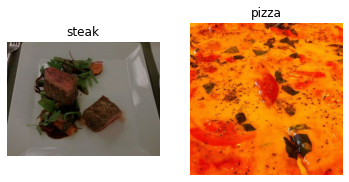

In [ ]:
# Visualize the data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")


### 2. Preprocess the data (prepare it for a model)

In [ ]:
# Define our directory datset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test"

Our next step is to turn our data into **batches**
A batch is a small subset of data, rather than looking at all the n number of images, the model will look into 32 images at a time, it does this for a couple of reason : 
* So many number of images cannot fit at the same time in the procsessor (GPU) memory
* Trying to learn the patterns in so many number of images in one hit could reusult in model not being able to learn very well.


In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, 
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32,
                                               seed=42)

test_data = test_datagen.flow_from_directory(directory=test_dir, # Target directory of images
                                             target_size=(224, 224), # Targer size of images (height, width)
                                             class_mode='binary', # type of data you are working with
                                             batch_size=32, # Size of mini batches to load data
                                             seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of training data batch
images, labels = train_data.next() # get the next batch of images/labels in train data
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there
len(train_data)

47

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.42352945, 0.43137258, 0.34509805],
          [0.31764707, 0.3254902 , 0.2392157 ],
          [0.26666668, 0.28235295, 0.18431373],
          ...,
          [0.42352945, 0.34901962, 0.37254903],
          [0.427451  , 0.34901962, 0.39607847],
          [0.45098042, 0.36862746, 0.427451  ]],
 
         [[0.2901961 , 0.30588236, 0.21568629],
          [0.45882356, 0.47450984, 0.37647063],
          [0.2627451 , 0.28627452, 0.18431373],
          ...,
          [0.39607847, 0.34117648, 0.34117648],
          [0.4156863 , 0.36862746, 0.37647063],
          [0.39607847, 0.34901962, 0.3647059 ]],
 
         [[0.37254903, 0.39607847, 0.29411766],
          [0.39607847, 0.41960788, 0.31764707],
          [0.30588236, 0.34117648, 0.23529413],
          ...,
          [0.34509805, 0.3254902 , 0.3019608 ],
          [0.30980393, 0.29803923, 0.27058825],
          [0.3372549 , 0.3254902 , 0.30588236]],
 
         ...,
 
         [[0.5137255 , 0.5019608 , 0.54509807],
          [0.52156

In [ ]:
images[7].shape

(224, 224, 3)

In [ ]:
#View first batch labels of our data
labels

array([1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.],
      dtype=float32)

### 3.Create a CNN model (start with a baseline)
A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline
**NOTE** - In deep learning, there is almost an infinite amount of architecture you could create, one of the best methods is to start with the simplest of architectures and if that works on your data, then introduce the complexity as required (eg. look at which current model is performing best in the field of your problem)

In [ ]:
# Make creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten , Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Lets create the model (this will be our basline, a three layer convolutional neural network)
model_4 = Sequential([
 Conv2D(filters=10, # Filters is the numbe of sliding windows going across the input and higher equals more complex model
        kernel_size=3, # kernel size is the size of the kernel going across gthe input 
        strides=1, # the size of the step the sliding window takes across the input
        padding='valid', # if same output shape is same as input shape, if valid, output shape gets compressed
        activation='relu',
        input_shape=(224, 224, 3)), # Input layer, (specify the input shape)
 Conv2D(10, 3, activation='relu'),
 Conv2D(10,3 , activation='relu'),
 Flatten(),
 Dense(1, activation='sigmoid') # Output layer working with binary classification)
])


**Practice** - Understand whats going on in as Conv2D layer by going through the CNN explainer website for 10-20 minutes
https://poloclub.github.io/cnn-explainer/

In [ ]:
# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer= Adam(),
                metrics=['accuracy'])



In [ ]:
# Get summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


###4. Fit the model

In [ ]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data, # this is a combination and labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 120s 3s/step - loss: 1.6846 - accuracy: 0.6333 - val_loss: 0.4624 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 117s 2s/step - loss: 0.4265 - accuracy: 0.8127 - val_loss: 0.3694 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 117s 2s/step - loss: 0.3448 - accuracy: 0.8560 - val_loss: 0.3539 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 116s 2s/step - loss: 0.2499 - accuracy: 0.9067 - val_loss: 0.3633 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 116s 2s/step - loss: 0.1445 - accuracy: 0.9493 - val_loss: 0.3896 - val_accuracy: 0.8240


In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 11s 647ms/step - loss: 0.2816 - accuracy: 0.8800


[0.28158149123191833, 0.8799999952316284]

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

### 5. Evaluating our model
It looks like or model is learning something, it means our model is learning something

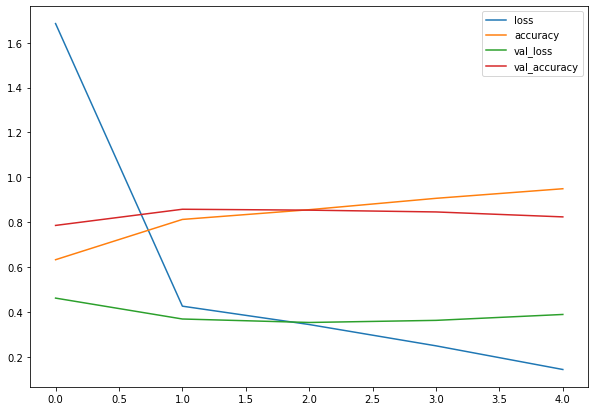

In [ ]:
# Lets plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))
plt.show()

In [ ]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss'])) # how many epochs did we run for

  # Plot loss
  plt.plot(epochs, loss, label='training loss')
  plt.plot(epochs, val_loss, label='val loss')
  plt.title('Loss')
  plt.xlabel('epochs')
  plt.legend()

  # Plot accuracy
  plt.figure() # makes another plot, dosen't plot in the previous plot
  plt.plot(epochs, accuracy, label='training accuracy')
  plt.plot(epochs, val_accuracy, label='val accuracy')
  plt.title('Accuracy')
  plt.xlabel('epochs')
  plt.legend()

**NOTE** - When a model's **validation loss** starts to increase, it is likely that the model is **overfitting** the training dataset.
This meand its learning the patterns in the training dataset too well and thus the model's ability to generalize on unseen data will be diminished

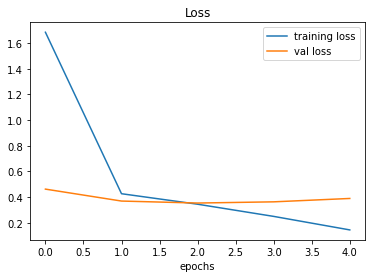

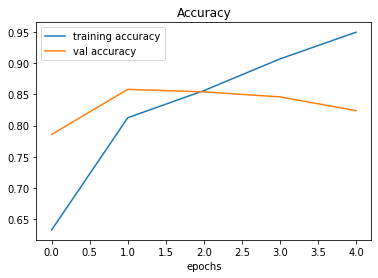

In [ ]:
# Check out loss and accuaracy of model_4
plot_loss_curves(history_4)

**NOTE** - Ideally the two training curves (training and validation) will be very similar to each other (training loss and validation loss decreasing at similar rates), when there are large differences your model is **overfitting**

### 6. Adjust the model parameters
Fitting a machine learning model comes in 3 steps:
0. Create a baseline
1. Beat the base line by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting
* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting could be 
* Add data augmentation
* Add regularization (such as MaxPool2D)
* Add more data..

**NOTE**: Reducing overfitting is also known as regularization



In [ ]:
# Create the model( this is going to be our new baseline)
model_5 = Sequential([
 Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
 MaxPool2D(pool_size=2),
 Conv2D(10, 3, activation='relu'),
 MaxPool2D(),
 Conv2D(10, 3, activation='relu'),
 MaxPool2D(),
 Flatten(),
 Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 52s 1s/step - loss: 0.6354 - accuracy: 0.6620 - val_loss: 0.4848 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 51s 1s/step - loss: 0.5095 - accuracy: 0.7627 - val_loss: 0.4017 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 51s 1s/step - loss: 0.4362 - accuracy: 0.8087 - val_loss: 0.3707 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 51s 1s/step - loss: 0.4082 - accuracy: 0.8247 - val_loss: 0.3382 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 51s 1s/step - loss: 0.3895 - accuracy: 0.8380 - val_loss: 0.3302 - val_accuracy: 0.8480


In [ ]:
#Get a summary of our model with Max Pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


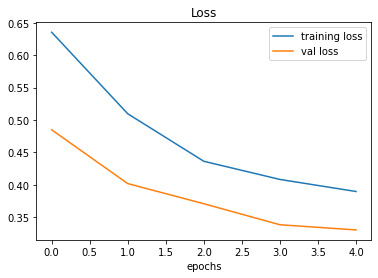

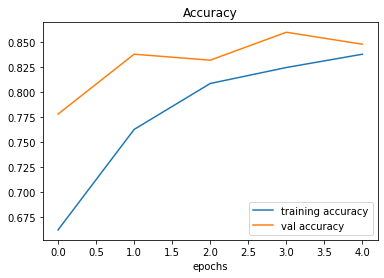

In [ ]:
# Plot the training curves and accuracy of model_5
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [ ]:
# Create ImageDataGenerator training with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=0.2, # how much do you want to rotate an image?
                                   shear_range=0.2, # how much do you want to shear an image
                                   zoom_range=0.2, # zoom in randomly on an image
                                   width_shift_range=0.2, # move your image around on the X axis
                                   height_shift_range=0.3, # move your image around on the Y axis
                                   horizontal_flip=True)
# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)


**Question** : What is data augmentation??
Data augmentation is the process of altering our training data leading it to have more diversity and in turn allowing our models to learn more generalizable patterns and altering might mean adjusting the rotation of the image, flipping it, cropping it or something similar

Lets write some code to visualize data augmentation

In [ ]:
# Import data and augment it from training directory
print("Augmented training data : ")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   class_mode='binary',
                                                                   batch_size=32,
                                                                   target_size=(224, 224),
                                                                   shuffle=False) # just for demonstration purpose
print("Non augmented training data : ")
# Create non-augmented train batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)
# Crete non augmented test data batches
print("Non augmented test data : ")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')


Augmented training data : 
Found 1500 images belonging to 2 classes.
Non augmented training data : 
Found 1500 images belonging to 2 classes.
Non augmented test data : 
Found 500 images belonging to 2 classes.


**NOTE** :  Data augmentation is usually only performed on training data. Using `ImageDataGenerator` built-in-data augmentation parameters, our images are left as they are in the directories but modifies as they are loaded into the model

Finally lets visualize some augmented data

In [ ]:
# Lets get some data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note : Labels arent augmented, only data (images)

showing image number: 13


(-0.5, 223.5, 223.5, -0.5)

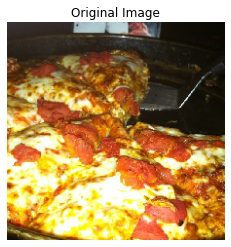

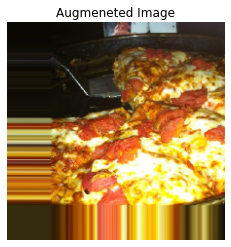

In [ ]:
# Show the original image and the augmented image
import random
random_number = random.randint(0, 32) # batch size is 32
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis('off')
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmeneted Image")
plt.axis('off')


No we have seen what augmneted training data look like, lets build model and see how it looks on augmented data

In [ ]:
# Create a model (same as model_5)
model_6 = Sequential([
 Conv2D(10, 3, input_shape=(224, 224, 3), activation='relu'),
 MaxPool2D(pool_size=2),
 Conv2D(10, 3 , activation='relu'),
 MaxPool2D(pool_size=2),
 Conv2D(10, 3, activation='relu'),
 MaxPool2D(),
 Flatten(),
 Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 66s 1s/step - loss: 0.7084 - accuracy: 0.5327 - val_loss: 0.6852 - val_accuracy: 0.5200
Epoch 2/5
47/47 [==============================] - 65s 1s/step - loss: 0.7134 - accuracy: 0.4740 - val_loss: 0.6785 - val_accuracy: 0.5080
Epoch 3/5
47/47 [==============================] - 65s 1s/step - loss: 0.6968 - accuracy: 0.4867 - val_loss: 0.6805 - val_accuracy: 0.5080
Epoch 4/5
47/47 [==============================] - 65s 1s/step - loss: 0.6935 - accuracy: 0.5007 - val_loss: 0.6691 - val_accuracy: 0.5100
Epoch 5/5
47/47 [==============================] - 66s 1s/step - loss: 0.6797 - accuracy: 0.5900 - val_loss: 0.6384 - val_accuracy: 0.7180


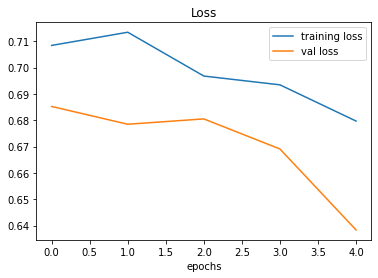

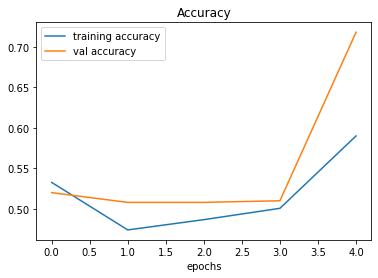

In [ ]:
plot_loss_curves(history_6)

Lets shuffle our augmented training data and train anotehr model(the same as before) and see what happens

In [ ]:
# Import data and augment it ans shuffle it from the training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224,224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data this time

Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model (same as model_5 and model_6)
model_7 = tf.keras.Sequential([
 tf.keras.layers.Conv2D(filters=10,
                        kernel_size=3,
                        padding='valid',
                        input_shape=(224,224,3),
                        activation='relu'),
 tf.keras.layers.MaxPool2D(pool_size=2),
 tf.keras.layers.Conv2D(10,3, activation='relu'),
 tf.keras.layers.MaxPool2D(pool_size=2),
 tf.keras.layers.Conv2D(10,3, activation='relu'),
 tf.keras.layers.MaxPool2D(pool_size=2),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, epochs=5,
            steps_per_epoch = len(train_data_augmented_shuffled),
            validation_data = test_data,
            validation_steps = len(test_data))



Epoch 1/5
47/47 [==============================] - 67s 1s/step - loss: 0.6610 - accuracy: 0.5787 - val_loss: 0.5881 - val_accuracy: 0.6920
Epoch 2/5
47/47 [==============================] - 66s 1s/step - loss: 0.5674 - accuracy: 0.7187 - val_loss: 0.4007 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 65s 1s/step - loss: 0.5220 - accuracy: 0.7433 - val_loss: 0.3665 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 65s 1s/step - loss: 0.5022 - accuracy: 0.7467 - val_loss: 0.3618 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 65s 1s/step - loss: 0.4781 - accuracy: 0.7820 - val_loss: 0.4263 - val_accuracy: 0.8000


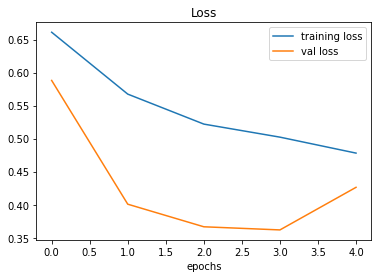

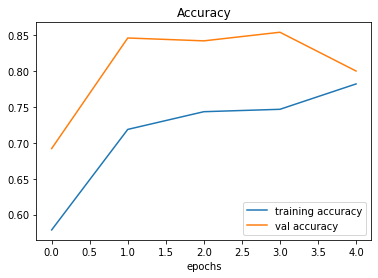

In [ ]:
plot_loss_curves(history_7)

**NOTE** - When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza and steal at the same time instead of first pizza and then steak)

### Step 7. Repeat until satisfied
Since we have alreay beaten our base line, there are few things we can try to improve our model,
* Increase the number of model layers ( eg. add more `Conv2D` layers/ `Maxpool` layers)
* Increase the number of filters in each convolutional layer
(e.g. 10 or 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data to give the model more opportunities to learn
* Use **Transfer Learning** to leverage what another image model has learnt and adjust it for our own case
**Practice** : Recreate the model on CNN expainer website( same as model_1 above) and see how it performs on the augmented shuffled data

## Making a prediction on our trained model on our own custom data

In [ ]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2021-12-07 07:10:33--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.03s   

2021-12-07 07:10:34 (62.1 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

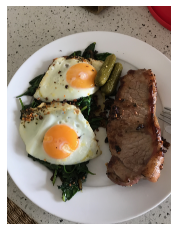

In [ ]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread('03-steak.jpeg')
plt.imshow(steak)
plt.axis('off')

In [ ]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

**NOTE** : When you train a neural network and you want to want to make a prediction with it on your own custom data, it is important that your custom data is preprocessed into the same format as the data your model was trained on

In [ ]:
# Lets create a helper function to import an image and resize it to be able to be used by our model
def load_and_prep_image(file_name, img_shape=224):
  """ reads an image from file name and turns it into a tensor and reshapes 
  it into (img_shape, img_shape, color_channels)"""
  # Read in the image
  img = tf.io.read_file(file_name)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image and get all pixel values between 0 and 1
  img = img/255.
  return img


In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image('03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
model_1.predict(tf.expand_dims(steak, axis=0))

array([[0.9626646]], dtype=float32)

In [ ]:
expanded_steak = tf.expand_dims(steak, axis=0)
expanded_steak.shape

TensorShape([1, 224, 224, 3])

In [ ]:
pred = model_7.predict(expanded_steak)
pred

array([[0.9328325]], dtype=float32)

Look like our custom image has been put through our model, however it currently ouputs prediction probabilities, wouldn't it be nice if we could visualize the image as well as the model's prediction??

In [ ]:
# Remind ourselves of our class namesclass_names 
print(class_names)

['pizza' 'steak']


In [ ]:
# we can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """ Imports and image located at the filename, makes prediction in the images and 
  plots the image with ethe predicted class as the title"""
   # Import the target image and preprocess it 
  img = load_and_prep_image(filename)

   # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

   # Get the predicred claa
  pred_class = class_names[int(tf.round(pred))]

   # Plot the image and the predicted class
  plt.imshow(img)
  plt.title(f'Prediction : {pred_class}')
  plt.axis('off')

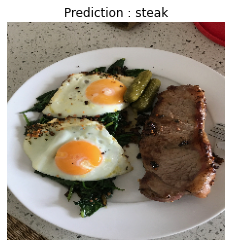

In [ ]:
# Test our model on a custom image
pred_and_plot(model_1, '03-steak.jpeg', class_names)

Our model works!!!, Let's try it on another image, this time pizza

--2021-12-07 07:11:52--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.02s   

2021-12-07 07:11:52 (147 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]



(-0.5, 3023.5, 4031.5, -0.5)

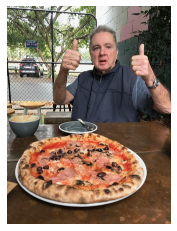

In [ ]:
# Download another test custom image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
img = mpimg.imread('03-pizza-dad.jpeg')
plt.imshow(img)
plt.axis('off')

In [ ]:
def load_and_prep_image1(filename, target_shape=224):
  # Load the image
  img = tf.io.read_file(filename)

  # Decode the image into a tensor
  img = tf.image.decode_image(img)

  # resize the image
  img = tf.image.resize(img, [target_shape, target_shape])

  # Scale the image
  img = img/255.

  return(img)

In [ ]:
pizza_dad = load_and_prep_image1('03-pizza-dad.jpeg')

In [ ]:
model_1.predict(tf.expand_dims(pizza_dad, axis=0))

array([[0.3008635]], dtype=float32)

In [ ]:
def make_prediction(model, filename, class_names):
  """ we will predict the image and show the image along with the class name of our prediction"""
  # Load and prepare the image
  img = load_and_prep_image1(filename)
  # Make the prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  # Display the image along with the predicted class name
  plt.imshow(img)
  pred_class = class_names[int(tf.round(pred))]
  plt.title(f'Prediction : {pred_class}')
  plt.axis('off')


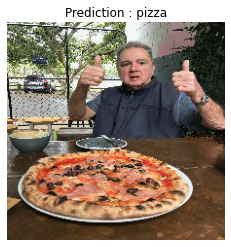

In [ ]:
make_prediction(model_1, '03-pizza-dad.jpeg', class_names)